# Notebook de nettoyage - Adrian Rodriguez - Projet 3 parcours Ingénieur Machine Learning

---
# 0. Contexte


Vous êtes consultant pour Olist, une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

### Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

### Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

Pour des raisons de confidentialité, Olist ne fournit pas beaucoup de données, à vous de fouiller dans celles dont vous disposez et de créer les meilleures features pour les exploiter.

Enfin, votre client, Olist, a spécifié sa demande ainsi :

- La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
- Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
- Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

# 1. Importation et exploration préliminaire

In [110]:
import pandas as pd
from pandas_profiling import ProfileReport
import glob
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from functions import *

pd.options.display.max_columns = None
plt.style.use("default")

In [111]:
# Pour vérifier le respect de la convention PEP8
# Installation conda non diponible. Utiliser pip
%load_ext pycodestyle_magic
%pycodestyle_on

13:1: W391 blank line at end of file


In [112]:
df_dict = {}
for file in glob.glob('src/olist/*csv'):
    df_name = file.replace('src/olist\\', 'df_').replace('olist_', '')
    df_name = df_name.replace('_dataset.csv', '').replace('.csv', '')
    print(df_name)
    df_dict[df_name] = pd.read_csv(file)

df_customers
df_geolocation
df_orders
df_order_items
df_order_payments
df_order_reviews
df_products
df_sellers
df_product_category_name_translation


In [113]:
for name, df in df_dict.items():
    display(name)
    display(df.info())
    display(df.head())

'df_customers'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'df_geolocation'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


'df_orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'df_order_items'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'df_order_payments'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'df_order_reviews'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'df_products'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'df_sellers'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'df_product_category_name_translation'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<img src="src/relation.png"/>

In [114]:
merge_list = [df_dict['df_orders'],
              df_dict['df_order_items'],
              df_dict['df_order_payments'],
              df_dict['df_order_reviews'],
              df_dict['df_products'],
              df_dict['df_product_category_name_translation']]

df_raw = df_dict['df_customers']
for df in merge_list:
    df_raw = pd.merge(df_raw, df)

df_raw.shape

(116581, 37)

In [115]:
df_raw.dtypes.to_csv('src/columns.csv')

In [116]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    116581 non-null  object 
 1   customer_unique_id             116581 non-null  object 
 2   customer_zip_code_prefix       116581 non-null  int64  
 3   customer_city                  116581 non-null  object 
 4   customer_state                 116581 non-null  object 
 5   order_id                       116581 non-null  object 
 6   order_status                   116581 non-null  object 
 7   order_purchase_timestamp       116581 non-null  object 
 8   order_approved_at              116567 non-null  object 
 9   order_delivered_carrier_date   115368 non-null  object 
 10  order_delivered_customer_date  114066 non-null  object 
 11  order_estimated_delivery_date  116581 non-null  object 
 12  order_item_id                 

In [117]:
df_raw

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,3570,sao paulo,SP,b99217b1fcf2fdeace7b8d869b76cb91,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-03-08 20:09:40,2018-03-15 22:04:49,2018-04-02 00:00:00,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,1,credit_card,3,110.44,048757148581cbd2c92bc96ca5d73211,5,NaN,NaN,2018-03-16 00:00:00,2018-03-19 09:12:20,fashion_roupa_i

In [118]:
df_raw['order_purchase_timestamp'] = \
    pd.to_datetime(df_raw['order_purchase_timestamp'],
                   format="%Y-%m-%d %H:%M:%S")

df_2017 = df_raw[df_raw.order_purchase_timestamp.dt.year == 2017]
df_2017

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,2017-04-11 10:16:56,2017-04-24 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-04-05 15:25:11,126.99,15.06,1,credit_card,5,142.05,1496c2a9c41a846ba946a98a09879660,4,NaN,NaN,2017-04-12 00:00:00,2017-04-15 15:34:45,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116574,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,89700,concordia,SC,3be3bae6f665380f803dc59c9053cf26,processing,2017-08-06 14:18:45,2017-08-08 04:10:13,NaN,NaN,2017-08-31 00:00:00,1,2b18330ce86ae5c606250b75b499f370,7fe21dd00d2f4943ae09525efa2fd674,2017-08-14 04:10:13,49.90,16.79,1,boleto,1,66.69,84dd398af6cf56be0bd7eba2f4df3050,1,NaN,NaN,2017-09-03 00:00:00,2017-09-07 09:55:18,fashion_roupa_infanto_juvenil,42.0,277.0,3.0,120.0,19.0,11.0,15.0,fa

In [119]:
df_2017[df_2017.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english


In [120]:
print('Chiffres-clés 2017')
print(f'Clients : {df_2017.customer_unique_id.drop_duplicates().count()}')
print(f'Commandes : {df_2017.order_id.drop_duplicates().count()}')
print(f'Volume de produits vendus : {df_2017.customer_id.count()}')

Chiffres-clés 2017
Clients : 42472
Commandes : 43788
Volume de produits vendus : 52994


# Etude du taux de rétention 2017

In [121]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [122]:
# Récupération des mois de commandes
df_2017['order_purchase_month'] = df_2017.order_purchase_timestamp.apply(get_month)
# Récupération de la première date de commande pour le client
df_2017['cohort_month'] = (df_2017.groupby('customer_unique_id')
                           ['order_purchase_month'].transform('min'))

2:80: E501 line too long (83 > 79 characters)
2:80: E501 line too long (83 > 79 characters)
2:80: E501 line too long (83 > 79 characters)


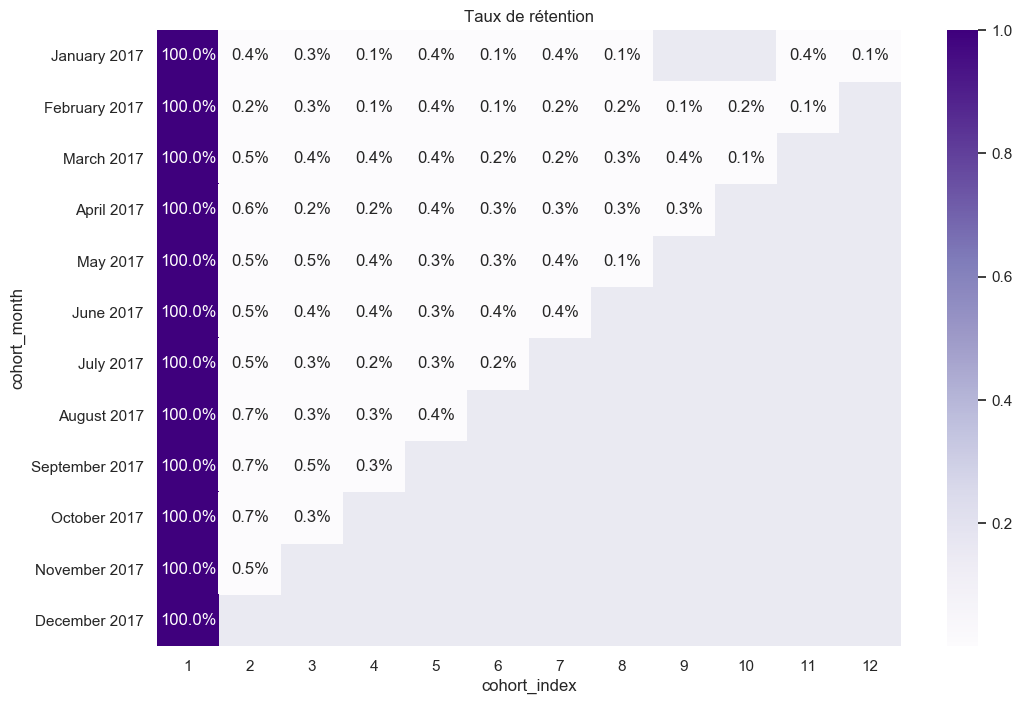

In [123]:
plt.figure(figsize=(12, 8))
plt.title('Taux de rétention')
sns.heatmap(retention,
            annot=True,
            fmt='.1%',
            cmap='Purples')

plt.savefig('img/img_retention_map.png',
            dpi=500,
            quality=95,
            transparent=True)

# RFM

In [87]:
# Calcul en mois de la différence entre la première commande et celle observée
order_purchase_year, order_purchase_month, _ = \
    get_date_int(df_2017, 'order_purchase_month')
cohort_year, cohort_month, _ = get_date_int(df_2017, 'cohort_month')

years_diff = order_purchase_year - cohort_year
months_diff = order_purchase_month - cohort_month

df_2017['cohort_index'] = years_diff * 12 + months_diff + 1

# Construction du tableau pivoté pour observé le taux de rétention
cohort_data = (df_2017.groupby(['cohort_month', 'cohort_index'])
               ['customer_unique_id'].apply(pd.Series.nunique).reset_index())
cohort_counts = cohort_data.pivot(index='cohort_month',
                                  columns='cohort_index',
                                  values='customer_unique_id')

# Taux de rétention
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index = retention.index.strftime('%B %Y')
retention.round(3) * 100

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
January 2017,100.0,0.4,0.3,0.1,0.4,0.1,0.4,0.1,NaN,NaN,0.4,0.1
February 2017,100.0,0.2,0.3,0.1,0.4,0.1,0.2,0.2,0.1,0.2,0.1,NaN
March 2017,100.0,0.5,0.4,0.4,0.4,0.2,0.2,0.3,0.4,0.1,NaN,NaN
April 2017,100.0,0.6,0.2,0.2,0.4,0.3,0.3,0.3,0.3,NaN,NaN,NaN
May 2017,100.0,0.5,0.5,0.4,0.3,0.3,0.4,0.1,NaN,NaN,NaN,NaN
June 2017,100.0,0.5,0.4,0.4,0.3,0.4,0.4,NaN,NaN,NaN,NaN,NaN
July 2017,100.0,0.5,0.3,0.2,0.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN
August 2017,100.0,0.7,0.3,0.3,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2017,100.0,0.7,0.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


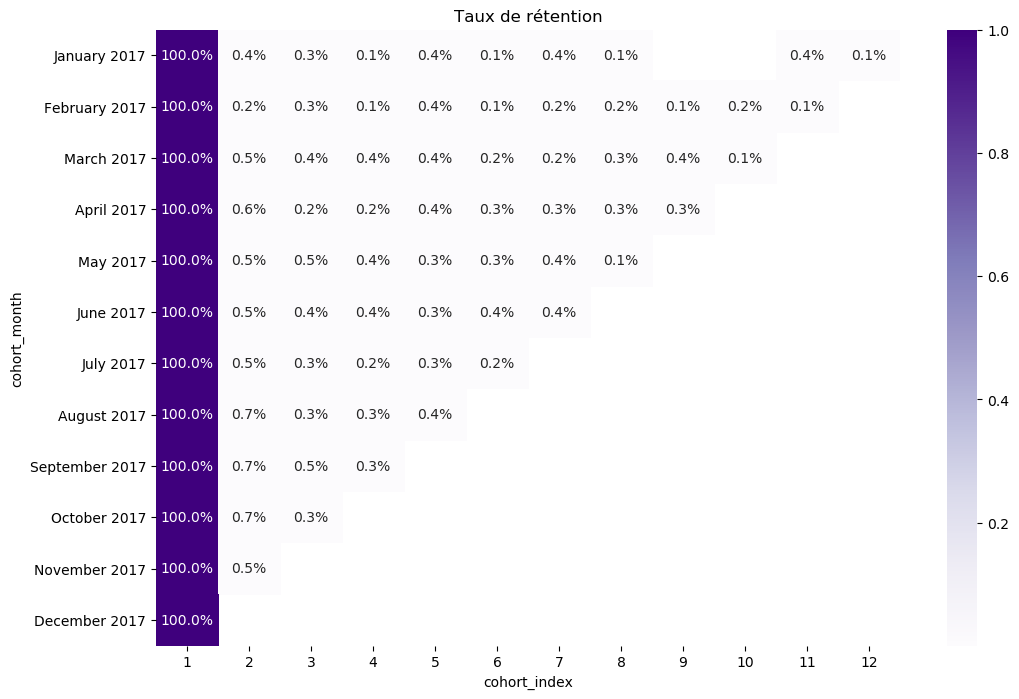

In [124]:
plt.figure(figsize=(12, 8))
plt.title('Taux de rétention')
sns.heatmap(retention,
            annot=True,
            fmt='.1%',
            cmap='Purples')

plt.savefig('img/img_retention_map.png',
            dpi=500,
            quality=95,
            transparent=True)

# RFM

In [127]:
# Payment value
df_2017['payment_quartiles'] = pd.qcut(df_2017.payment_value,
                                       q=4,
                                       labels=range(1, 5))

df_2017[['customer_unique_id', 'payment_value', 'payment_quartiles']]

,customer_unique_id,payment_value,payment_quartiles
0,861eff4711a542e4b93843c6dd7febb0,146.87,3
1,9eae34bbd3a474ec5d07949ca7de67c0,275.79,4
2,9eae34bbd3a474ec5d07949ca7de67c0,275.79,4
3,3c799d181c34d51f6d44bbbc563024db,140.61,3
5,567ab47ca4deb92d46dbf54dce07d0a7,142.05,3
...,...,...,...
116574,93d9e516a351a7747fc9830ae9525062,66.69,2
116577,f979a07fc18b2af3780a796ba14b96f4,54.09,1
116578,1b553902a5bbe6ee54a3aaa7cbfb6816,124.52,3
116579,d8bee9ec375c3a0f9ef8ed7456a51dcd,209.06,4


In [154]:
# Recency
df_2017['today'] = dt.date.today()
df_2017['today'] = pd.to_datetime(df_2017['today'], format='%Y-%m-%d')
df_2017['recency_days'] = df_2017.today - df_2017.order_purchase_timestamp

In [156]:
r_labels = list(range(4, 0, -1))
df_2017['recency_quartiles'] = pd.qcut(df_2017.recency_days,
                                       q=4,
                                       labels=r_labels)

df_2017[['customer_unique_id', 'recency_days', 'recency_quartiles']]

,customer_unique_id,recency_days,recency_quartiles
0,861eff4711a542e4b93843c6dd7febb0,1168 days 08:54:25,1
1,9eae34bbd3a474ec5d07949ca7de67c0,991 days 23:09:47,3
2,9eae34bbd3a474ec5d07949ca7de67c0,991 days 23:09:47,3
3,3c799d181c34d51f6d44bbbc563024db,1177 days 03:48:34,1
5,567ab47ca4deb92d46dbf54dce07d0a7,1222 days 08:49:43,1
...,...,...,...
116574,93d9e516a351a7747fc9830ae9525062,1086 days 09:41:15,2
116577,f979a07fc18b2af3780a796ba14b96f4,1023 days 00:08:11,3
116578,1b553902a5bbe6ee54a3aaa7cbfb6816,1167 days 06:15:26,1
116579,d8bee9ec375c3a0f9ef8ed7456a51dcd,1278 days 12:51:00,1


In [146]:
df_2017.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                    

---
---

In [23]:
dim = pd.read_excel('dictionnaire.xlsx', sheet_name='variable')
columns = dim.variables[dim.model == 'yes'].to_list()

customer = df_raw[columns]
customer

,customer_id,order_purchase_timestamp,price,freight_value,review_score,payment_sequential,payment_type,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,124.99,21.88,4,1,credit_card,146.87,41.0,1141.0,1.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,112.99,24.90,1,1,credit_card,275.79,41.0,1141.0,1.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,112.99,24.90,1,1,credit_card,275.79,41.0,1141.0,1.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,124.99,15.62,3,1,credit_card,140.61,41.0,1141.0,1.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,106.99,30.59,4,1,credit_card,137.58,41.0,1141.0,1.0,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...
116576,8325d6e7af2f2bfb58cf040729b232dd,2018-03-07 17:42:06,39.99,10.15,5,1,credit_card,110.44,38.0,168.0,1.0,fashion_childrens_clothes
116577,85485f38b20ed1e287120d30cf39ee7d,2017-10-08 23:51:49,39.99,14.10,5,1,credit_card,54.09,38.0,168.0,1.0,fashion_childrens_clothes
116578,14acb30bbc064408dcb8cdd3c92b0c97,2017-05-17 17:44:34,110.00,14.52,5,1,credit_card,124.52,52.0,494.0,4.0,fashion_childrens_clothes
116579,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,183.29,25.77,4,1,credit_card,209.06,55.0,506.0,1.0,security_and_services


In [24]:
category = customer.groupby('product_category_name_english')['customer_id'].count()
category.sort_values(ascending=False).head(20)

product_category_name_english
bed_bath_table              11990
health_beauty               10030
sports_leisure               9005
furniture_decor              8833
computers_accessories        8151
housewares                   7380
watches_gifts                6213
telephony                    4726
garden_tools                 4590
auto                         4400
toys                         4281
cool_stuff                   3999
perfumery                    3589
baby                         3204
electronics                  2847
stationery                   2625
fashion_bags_accessories     2170
pet_shop                     2030
office_furniture             1788
consoles_games               1192
Name: customer_id, dtype: int64

1:80: E501 line too long (83 > 79 characters)
1:80: E501 line too long (83 > 79 characters)
